#### Step 1: Import Python Libraries

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import locale
import sys
sys.path.insert(0,'../src')
import file_import
from pickle import load
from datetime import date

#### Step 2: Reading Dataset

In [2]:
crime_df = pd.read_pickle('../data/pickled_df.pkl')

##### Step 3: Analyzing the Data

In [3]:
# Find the number of rows and columns in the DataFrame
num_rows, num_cols = crime_df.shape

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 7846809
Number of columns: 22


In [4]:
crime_df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [5]:
# Define the dependent variable (crime rate) and the independent variables (predictors)
dependent_variable = 'Primary Type'
independent_variables = ['Arrest', 'Domestic']

# Encode Boolean variables as integers (True=1, False=0)
crime_df['Arrest'] = crime_df['Arrest'].astype(int)
crime_df['Domestic'] = crime_df['Domestic'].astype(int)

# Encode 'Primary Type' column as numeric labels
label_encoder = LabelEncoder()
crime_df['Primary Type'] = label_encoder.fit_transform(crime_df['Primary Type'])

# Select the relevant columns from the DataFrame
data_subset = crime_df[independent_variables + [dependent_variable]]

# Separate the independent and dependent variables
X = data_subset[independent_variables]
y = data_subset[dependent_variable]

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.36227838 -9.31538505]
Intercept: 17.132307581382083


In [6]:
df1 = crime_df[['Primary Type', 'Ward']]
df1.head()

,Primary Type,Ward
0,34,8.0
1,9,15.0
2,19,5.0
3,6,31.0
4,9,23.0


In [7]:
# Count the number of unique values in the 'Ward' column
unique_ward_count = crime_df['Ward'].nunique()

print("Number of unique values in 'Ward' column:", unique_ward_count)

Number of unique values in 'Ward' column: 50


In [8]:
# Create a table showing the total number of crimes committed in each ward
ward_crime_counts = crime_df.groupby('Ward').size().reset_index(name='Total Crimes')

print(ward_crime_counts)

    Ward  Total Crimes
0    1.0        138141
1    2.0        255928
2    3.0        220325
3    4.0        145079
4    5.0        173287
5    6.0        239581
6    7.0        196558
7    8.0        199961
8    9.0        187712
9   10.0        123265
10  11.0         98279
11  12.0         88174
12  13.0         88774
13  14.0         97206
14  15.0        186441
15  16.0        207935
16  17.0        239173
17  18.0        119172
18  19.0         64200
19  20.0        237344
20  21.0        219128
21  22.0         84545
22  23.0         91882
23  24.0        284030
24  25.0        105467
25  26.0        122729
26  27.0        272597
27  28.0        331729
28  29.0        168111
29  30.0         98193
30  31.0         99098
31  32.0        119145
32  33.0         71892
33  34.0        202489
34  35.0         94423
35  36.0         76794
36  37.0        195574
37  38.0         75246
38  39.0         67919
39  40.0         76629
40  41.0         76791
41  42.0        300434
42  43.0   

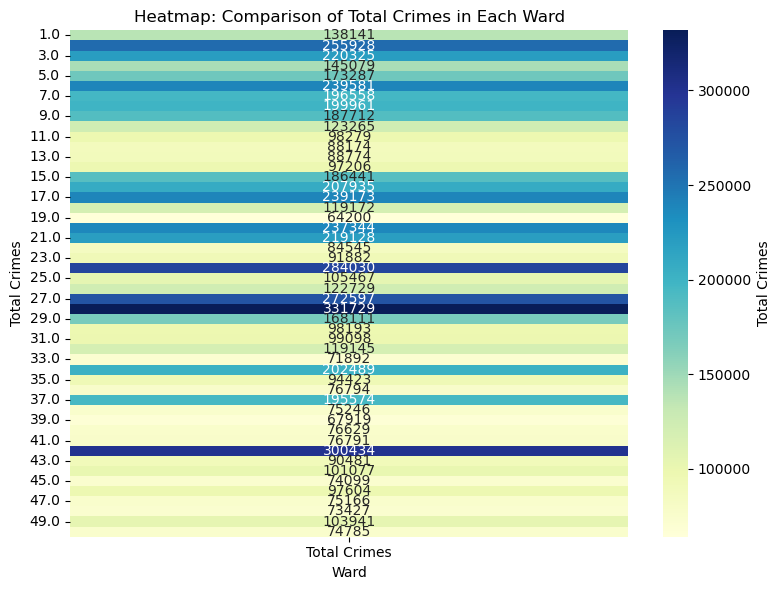

In [9]:
# Create a table showing the total number of crimes committed in each ward
ward_crime_counts = crime_df.groupby('Ward').size().reset_index(name='Total Crimes')

# Pivot the data to create a heatmap-friendly format
crime_heatmap_data = ward_crime_counts.pivot_table(index='Ward', columns=None, values='Total Crimes', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crime_heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Total Crimes'})
plt.xlabel('Ward')
plt.ylabel('Total Crimes')
plt.title('Heatmap: Comparison of Total Crimes in Each Ward')
plt.tight_layout()
plt.show()